In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import patsy

In [3]:
data = pd.read_csv('compas-scores-two-years.csv')

data = data[(data['is_recid'] != -1) & (data['c_charge_degree'] != 'O')]
data = data[(data['days_b_screening_arrest'] <= 30) & (data['days_b_screening_arrest'] >= -30)]
data = data.reset_index(drop=True)
non_recid = data[data['is_recid'] == 0]
recid = data[data['is_recid'] == 1]




In [4]:
aa_df = data[data['race'] == 'African-American']
c_df = data[data['race'] == 'Caucasian']

In [5]:
data['is_recid'].value_counts()

0    3182
1    2990
Name: is_recid, dtype: int64

In [157]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.predict(x_test)

In [160]:
pd.DataFrame({'feature':x_train.columns, 'importance':dtc.feature_importances_})

,feature,importance
0,C(sex)[Female],0.014699
1,C(sex)[Male],0.028144
2,C(c_charge_degree)[T.M],0.081265
3,C(new_cats)[T.Substances],0.050807
4,C(new_cats)[T.Theft],0.036709
5,C(new_cats)[T.violence],0.050523
6,age,0.401823
7,juv_fel_count,0.018002
8,juv_misd_count,0.022232
9,juv_other_count,0.035317


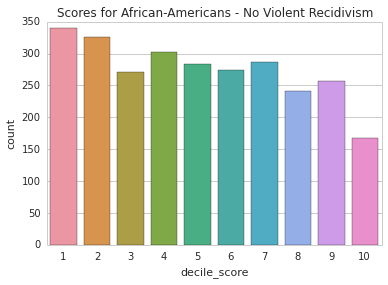

In [6]:
sns.set_style("whitegrid")
sns.plt.title('Scores for African-Americans - No Violent Recidivism')
sns.countplot(x='decile_score',data=aa_df[aa_df['is_violent_recid'] == 0],order=[1,2,3,4,5,6,7,8,9,10])

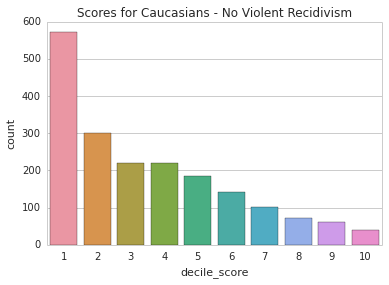

In [8]:
sns.set_style("whitegrid")
sns.plt.title('Scores for Caucasians - No Violent Recidivism')
sns.countplot(x='decile_score',data=c_df[c_df['is_violent_recid'] == 0],order=[1,2,3,4,5,6,7,8,9,10])

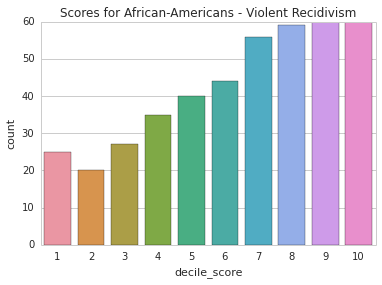

In [9]:
sns.set_style("whitegrid")
sns.plt.title('Scores for African-Americans - Violent Recidivism')
sns.countplot(x='decile_score',data=aa_df[aa_df['is_violent_recid'] == 1],order=[1,2,3,4,5,6,7,8,9,10])

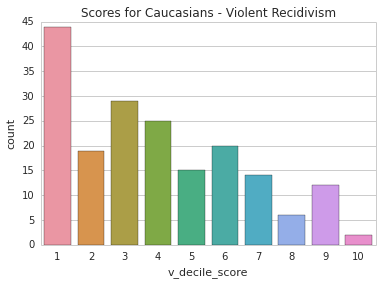

In [10]:
sns.set_style("whitegrid")
sns.plt.title('Scores for Caucasians - Violent Recidivism')
sns.countplot(x='v_decile_score',data=c_df[c_df['is_violent_recid'] == 1],order=[1,2,3,4,5,6,7,8,9,10])

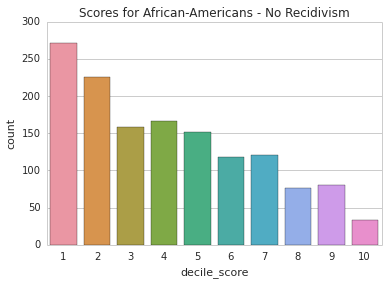

In [11]:
sns.set_style("whitegrid")
sns.plt.title('Scores for African-Americans - No Recidivism')
sns.countplot(x='decile_score',data=aa_df[aa_df['is_recid'] == 0],order=[1,2,3,4,5,6,7,8,9,10])

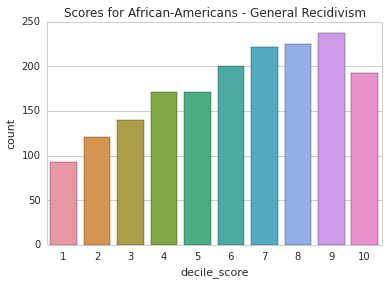

In [6]:
sns.set_style("whitegrid")
sns.plt.title('Scores for African-Americans - General Recidivism')
sns.countplot(x='decile_score',data=aa_df[aa_df['is_recid'] == 1],order=[1,2,3,4,5,6,7,8,9,10])

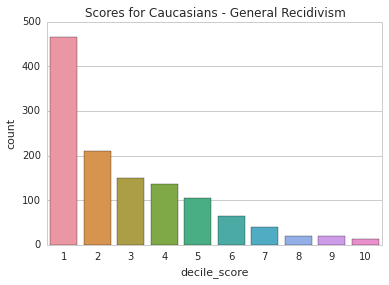

In [7]:
sns.set_style("whitegrid")
sns.plt.title('Scores for Caucasians - General Recidivism')
sns.countplot(x='decile_score',data=c_df[c_df['is_recid'] == 0],order=[1,2,3,4,5,6,7,8,9,10])

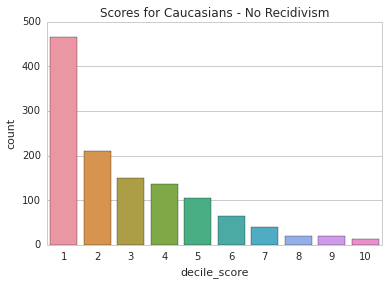

In [12]:
sns.set_style("whitegrid")
sns.plt.title('Scores for Caucasians - No Recidivism')
sns.countplot(x='decile_score',data=c_df[c_df['is_recid'] == 0],order=[1,2,3,4,5,6,7,8,9,10])

In [404]:
formula = 'is_recid ~ C(sex) +  age + juv_fel_count + juv_misd_count + juv_other_count + priors_count + C(c_charge_degree) - 1'
y, x = patsy.dmatrices(formula,data,return_type='dataframe')

In [405]:
x = (x - x.mean()) / x.std()

In [406]:
x.head()

,C(sex)[Female],C(sex)[Male],C(c_charge_degree)[T.M],age,juv_fel_count,juv_misd_count,juv_other_count,priors_count
0,-0.484874,0.484874,-0.744695,2.937999,-0.127912,-0.183217,-0.235083,-0.684358
1,-0.484874,0.484874,-0.744695,-0.045564,-0.127912,-0.183217,-0.235083,-0.684358
2,-0.484874,0.484874,-0.744695,-0.898011,-0.127912,-0.183217,1.889271,0.158854
3,-0.484874,0.484874,1.342615,0.806883,-0.127912,-0.183217,-0.235083,-0.684358
4,-0.484874,0.484874,-0.744695,0.551149,-0.127912,-0.183217,-0.235083,2.266882


In [407]:
lr = LogisticRegression()

In [408]:
# grid search

#alpha strength
#e.g. 10 to X power; x = -5 - 1 in increments of 20
Cs_lr = np.logspace(-5,1, 20)
  
#specify parameters you would like searched
search_parameters_lr = { 
   "penalty":             ['l1','l2'],   
   "C":                   Cs_lr, 
   "class_weight":        [None, "balanced"]
}

# instantiate gridserach
# pass model,search parameters, set cross validation number, and print out of process to 1)
grid = GridSearchCV(lr, search_parameters_lr, cv = 4, verbose = 1)

In [409]:
print x.shape
print y.shape

(6172, 8)
(6172, 1)


In [410]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.4,stratify=y)

In [411]:
grid.fit(x,np.ravel(y))

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    5.1s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   2.06914e-05,   4.28133e-05,   8.85867e-05,
         1.83298e-04,   3.79269e-04,   7.84760e-04,   1.62378e-03,
         3.35982e-03,   6.95193e-03,   1.43845e-02,   2.97635e-02,
         6.15848e-02,   1.27427e-01,   2.63665e-01,   5.45559e-01,
         1.12884e+00,   2.33572e+00,   4.83293e+00,   1.00000e+01]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [412]:
grid.best_params_

{'C': 0.0069519279617756054, 'class_weight': 'balanced', 'penalty': 'l1'}

In [413]:
estimator = grid.best_estimator_

In [414]:
coef = pd.DataFrame(estimator.coef_)
coef = coef.T

In [315]:
coef.head()

,0
0,-0.002917
1,0.058208
2,-0.017136
3,-0.391916
4,0.000000


In [129]:
estimator.coef_

array([[ 0.        ,  0.06112836, -0.01715325,  0.        ,  0.        ,
         0.        , -0.39189467,  0.        ,  0.        ,  0.04356301,
         0.64405605]])

In [316]:
estimator.fit(x_train,y_train)

/Users/aakktng/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.0069519279617756054, class_weight='balanced',
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)

In [317]:
scores = cross_val_score(estimator,x,np.ravel(y),cv=5)
print scores
print np.mean(scores)

[ 0.70445344  0.68097166  0.66207455  0.70583468  0.67585089]
0.685837046175


The following steps, we check the predictions, COMPAS score implications, and recidivism status to see if there is a big difference between the models. 

In [318]:
gs_guess = estimator.predict(x_test)

In [319]:
guesses = pd.DataFrame(gs_guess)

In [320]:
copy_y_test = y_test.copy()
copy_y_test['index'] = copy_y_test.index

In [321]:
copy_y_test = copy_y_test.reset_index(drop=True)

In [322]:
ver = pd.concat([guesses,copy_y_test],axis=1)

In [323]:
compas = []
for i in ver['index']:
    compas.append(data['score_text'][i])

In [324]:
compas = pd.DataFrame(compas)

In [325]:
verify = pd.concat([ver,compas],axis=1)

In [326]:
verify.head()

,0,is_recid,index,0
0,0,0,5296,Low
1,0,1,1941,Medium
2,1,1,4041,Medium
3,1,1,2570,Low
4,1,1,3066,High


In [327]:
verify.columns = ['K','is_recid','index','C']

In [328]:
verify.head()

,K,is_recid,index,C
0,0,0,5296,Low
1,0,1,1941,Medium
2,1,1,4041,Medium
3,1,1,2570,Low
4,1,1,3066,High


In [373]:
s = [0 if a == 'Low' else 1 for a in verify['C']]#High/Medium Compas Scores = Recidivate
s = pd.DataFrame(s)

In [374]:
acc.head()

,K,is_recid,index,C,0,test_value
0,0,0,5296,Low,0,0
1,0,1,1941,Medium,1,1
2,1,1,4041,Medium,1,1
3,1,1,2570,Low,0,0
4,1,1,3066,High,1,0


In [375]:
acc = pd.concat([verify,s],axis=1)

In [377]:
acc.head()

,K,is_recid,index,C,0
0,0,0,5296,Low,0
1,0,1,1941,Medium,1
2,1,1,4041,Medium,1
3,1,1,2570,Low,0
4,1,1,3066,High,1


In [388]:
K = 0
T = 0
for i in range(len(acc)):
    if acc['K'][i] == acc['is_recid'][i]:
         K = K + 1
    else:
        pass

In [400]:
T = 0
for i in range(len(acc)):
    if acc['F'][i] == acc['is_recid'][i]:
          T = T + 1

In [401]:
print K,T

1682 1623


In [380]:
acc.head()

,K,is_recid,index,C,0
0,0,0,5296,Low,0
1,0,1,1941,Medium,1
2,1,1,4041,Medium,1
3,1,1,2570,Low,0
4,1,1,3066,High,1


In [385]:
acc.columns = ['K','is_recid','index','C','F']

In [392]:
KTP = 0 
KTN = 0
for i in range(len(acc)):
    if (acc['K'][i] == 1) & (acc['is_recid'][i] == 1):
        KTP = KTP + 1
    elif (acc['K'][i] == 0) & (acc['is_recid'][i] == 0):
        KTN = KTN + 1
    else:
        pass
        

In [393]:
print KTP, KTN

709 973


In [394]:
CTP = 0 
CTN = 0
for i in range(len(acc)):
    if (acc['F'][i] == 1) & (acc['is_recid'][i] == 1):
        CTP = CTP + 1
    elif (acc['F'][i] == 0) & (acc['is_recid'][i] == 0):
        CTN = CTN + 1
    else:
        pass

In [419]:
print CTP, CTN

730 893


In [399]:
len(iz)

730

In [395]:
print CTP, CTN

730 893


In [361]:
y_test.is_recid.value_counts()

0    1273
1    1196
Name: is_recid, dtype: int64

In [333]:
s = pd.DataFrame(s)
s.columns = ['C_value']

In [334]:
len(acc)

2469

In [335]:
K

1682

In [336]:
T

332

In [153]:
verify.head()

,K,is_recid,index,C
0,0,1,4347,Low
1,1,0,5135,High
2,1,1,2446,High
3,1,1,479,Low
4,1,1,1155,Medium


In [402]:
print '\nClassification report:\n', classification_report(y_test, gs_guess)


Classification report:
             precision    recall  f1-score   support

        0.0       0.67      0.76      0.71      1273
        1.0       0.70      0.59      0.64      1196

avg / total       0.68      0.68      0.68      2469



In [155]:
pred_p = estimator.predict_proba(x_test)[:,1].ravel()

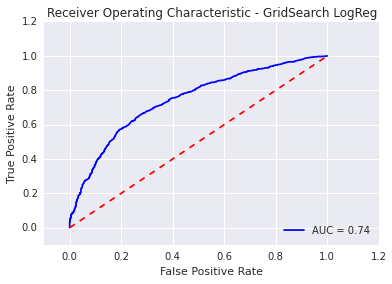

In [156]:
pred_p = estimator.predict_proba(x_test)[:,1].ravel()
from sklearn.metrics import roc_curve, auc


false_p_rate, true_p_rate, thresholds = roc_curve(y_test, pred_p)
roc_auc = auc(false_p_rate, true_p_rate)

plt.title('Receiver Operating Characteristic - GridSearch LogReg')
plt.plot(false_p_rate, true_p_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()